# Install & Import

In [ ]:
! pip install gym==0.21.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached gym-0.21.0.tar.gz (1.5 MB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for gym
  Running setup.py clean for gym
Failed to build gym
  Running setup.py install for gym ... done
  DEPRECATION: gym was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. pip 23.1 will enforce this behaviour change. A possible replacement is to fix the wheel build issue reported above. Discussion can be found at https://github.com/pypa/pip/issues/8368


In [ ]:
!pip install setuptools==66

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 18.5 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
dopamine-rl 4.0.6 requires gym<=0.25.2, which is not installed.


In [ ]:
import torch
print(torch.__version__)

2.0.0+cu118


In [ ]:
!pip install torch==1.12.0+cpu -f https://download.pytorch.org/whl/torch_stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.0/189.0 MB 6.6 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.0.0+cu118
    Uninstalling torch-2.0.0+cu118:
      Successfully uninstalled torch-2.0.0+cu118
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.15.1+cu118 requires torch==2.0.0, but you have torch 1.12.0+cpu which is incompatible.
torchtext 0.15.1 requires torch==2.0.0, but you have torch 1.12.0+cpu which is incompatible.
torchdata 0.6.0 requires torch==2.0.0, but you have torch 1.12.0+cpu which is incompatible.
torchaudio 2.0.1+cu118 requires torch==2.0.0, but you have torch 1.12.0+cpu which is incompatible.


In [ ]:
! pip install gym_anytrading

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install stable_baselines3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached stable_baselines3-1.8.0-py3-none-any.whl (174 kB)


In [ ]:
# Gym stuff
import gym
import gym_anytrading
import torch

# Stable-baselines3
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C

#Other
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Get data

In [ ]:
# Read file
df=pd.read_csv("https://raw.githubusercontent.com/nicknochnack/Reinforcement-Learning-for-Trading/main/data/gmedata.csv")

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume
0,03/12/2021,275.00,295.50,262.27,264.5,"25,845,900"
1,03/11/2021,241.64,281.50,232.60,260.0,"28,312,490"
2,03/10/2021,269.43,348.50,172.00,265.0,"71,570,570"
3,03/09/2021,217.71,249.85,208.51,246.9,"39,099,328"
4,03/08/2021,154.89,210.87,146.10,194.5,"63,565,621"


In [ ]:
df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume     object
dtype: object

In [ ]:
# Convert to correct date type
df['Date']=pd.to_datetime(df['Date'])
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume            object
dtype: object

In [ ]:
# Set date column as index
df.set_index('Date',inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-03-12,275.00,295.50,262.27,264.5,"25,845,900"
2021-03-11,241.64,281.50,232.60,260.0,"28,312,490"
2021-03-10,269.43,348.50,172.00,265.0,"71,570,570"
2021-03-09,217.71,249.85,208.51,246.9,"39,099,328"
2021-03-08,154.89,210.87,146.10,194.5,"63,565,621"


In [ ]:
# Pass data to gym environment
env=gym.make('stocks-v0',df=df,frame_bound=(5,100),window_size=5)
env.signal_features


array([[ 2.6450e+02,  0.0000e+00],
       [ 2.6000e+02, -4.5000e+00],
       [ 2.6500e+02,  5.0000e+00],
       [ 2.4690e+02, -1.8100e+01],
       [ 1.9450e+02, -5.2400e+01],
       [ 1.3774e+02, -5.6760e+01],
       [ 1.3235e+02, -5.3900e+00],
       [ 1.2418e+02, -8.1700e+00],
       [ 1.1818e+02, -6.0000e+00],
       [ 1.2040e+02,  2.2200e+00],
       [ 1.0174e+02, -1.8660e+01],
       [ 1.0873e+02,  6.9900e+00],
       [ 9.1710e+01, -1.7020e+01],
       [ 4.4970e+01, -4.6740e+01],
       [ 4.6000e+01,  1.0300e+00],
       [ 4.0590e+01, -5.4100e+00],
       [ 4.0690e+01,  1.0000e-01],
       [ 4.5940e+01,  5.2500e+00],
       [ 4.9510e+01,  3.5700e+00],
       [ 5.2400e+01,  2.8900e+00],
       [ 5.1100e+01, -1.3000e+00],
       [ 5.1200e+01,  1.0000e-01],
       [ 5.0310e+01, -8.9000e-01],
       [ 6.0000e+01,  9.6900e+00],
       [ 6.3770e+01,  3.7700e+00],
       [ 5.3500e+01, -1.0270e+01],
       [ 9.2410e+01,  3.8910e+01],
       [ 9.0000e+01, -2.4100e+00],
       [ 2.2500e+02,

# Build environment

info {'total_reward': -276.56999999999994, 'total_profit': 0.02676672499099278, 'position': 1}


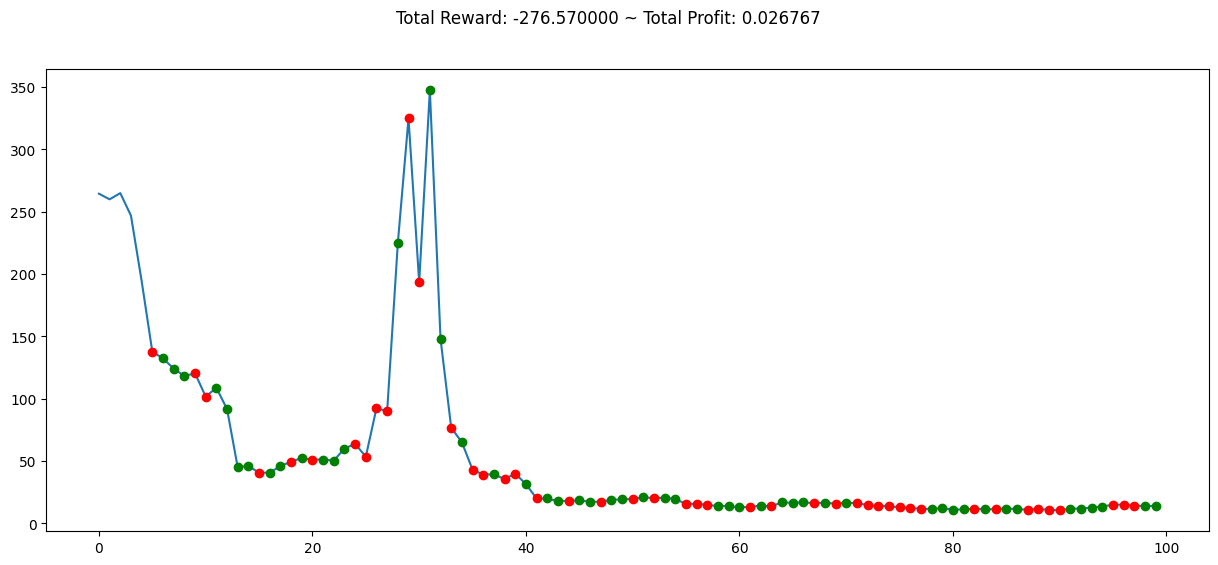

In [ ]:
state=env.reset()
while True:
    action=env.action_space.sample()
    n_state,reward,done,info=env.step(action)
    if done:
        print("info",info)
        break
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

# Build environment using stable-baselines3 & train

In [ ]:
# Wrap gym environment into stable_baselines3 environment
env_maker=lambda:gym.make('stocks-v0',df=df,frame_bound=(5,100),window_size=5)
env=DummyVecEnv([env_maker])

In [ ]:
# Set up algorithm & train
model=A2C('MlpPolicy',env,verbose=1)
model.learn(total_timesteps=10000)

Using cpu device
------------------------------------
| time/                 |          |
|    fps                | 537      |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.69    |
|    explained_variance | 0.00269  |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 130      |
|    value_loss         | 4.2e+04  |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 579      |
|    iterations         | 200      |
|    time_elapsed       | 1        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -0.605   |
|    explained_variance | 0.0202   |
|    learning_rate      | 0.0007   |
|    n_updates          | 199      |
|    policy_loss        | -0.35    |
|    value_loss      

# Evaluation

In [ ]:
env=gym.make('stocks-v0',df=df,frame_bound=(90,110),window_size=5)
obs=env.reset()
while True:
  obs=obs[np.newaxis,...]
  action,_states=model.predict(obs)
  obs,rewards,done,info=env.step(action)
  if done:
    print("info",info)
    break

info {'total_reward': 0.0, 'total_profit': 0.7944222506393862, 'position': 1}


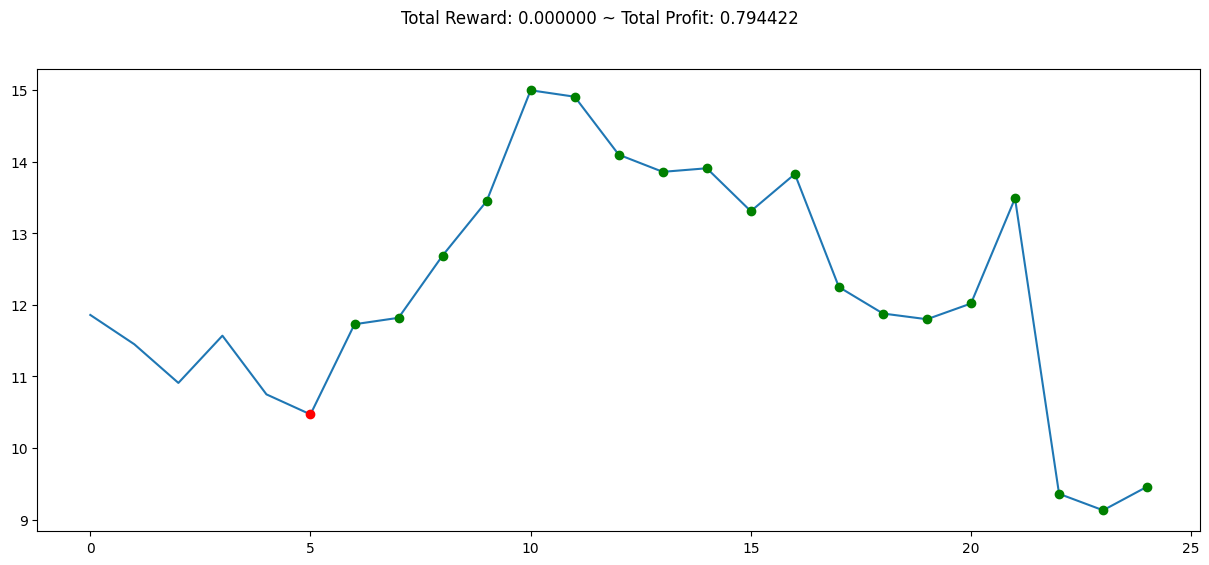

In [ ]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()